In [515]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

# 1. Data Exploration, Cleaning and Preparation

### Load the data

In [516]:
df = pd.read_csv(r'C:\Users\zbcprx\Documents\Bryan new files\Python\Scripts\ML\Applied Machine Learning Algorithms (Linkedin Learning)\Ex_Files_Machine_Learning_Algorithms\Exercise Files\titanic.csv')

In [517]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [518]:
print('-----Information-----')
print(df.info())

-----Information-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


From the information above, we see that there are null values and there are also object data types which we may need to convert later on so we can use in our model.

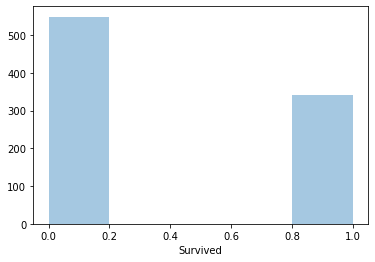

In [557]:
sns.distplot(df['Survived'], kde=False)

There is almost equal number of labels so we can use accuracy as our scoring method in the model selection later on.

### Fill missing values

Let us check for missing values through heatmap visualization.

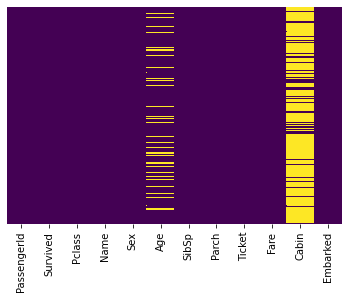

In [519]:
sns.heatmap(df.isna(), cmap='viridis', cbar=None, yticklabels=False)

Only Age and Cabin has missing values. Let us impute the Age with the median.

In [520]:
df['Age'].fillna(df['Age'].median(), inplace=True)

Next we fill the missing values for the Cabin. From the data, we can see that the passenger either has a cabin or no cabin. So for those who do not have a cabin, we assign a value of 0 while we assign a value of 1 for those who have.

In [521]:
df['Cabin'].fillna(0, inplace=True)
df['Cabin'] = df['Cabin'].map(lambda p: 1 if p is not 0 else 0)

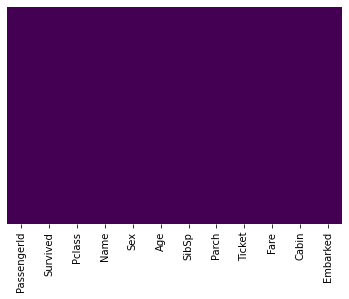

In [522]:
sns.heatmap(df.isna(), cmap='viridis', cbar=None, yticklabels=False)

### Combine related variables

From the data, we can see that we have columns 'SibSp' (number of siblings and spouses) and 'Parch' (number of parents and children) which are both related and we can combine to create 1 variable. To confirm, let us check through visualization the trend on Survival.

<Figure size 432x288 with 0 Axes>

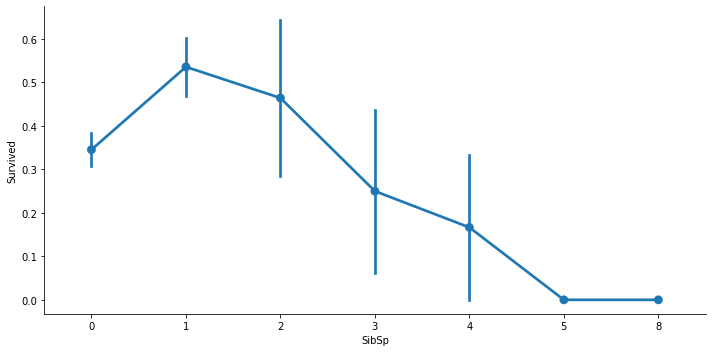

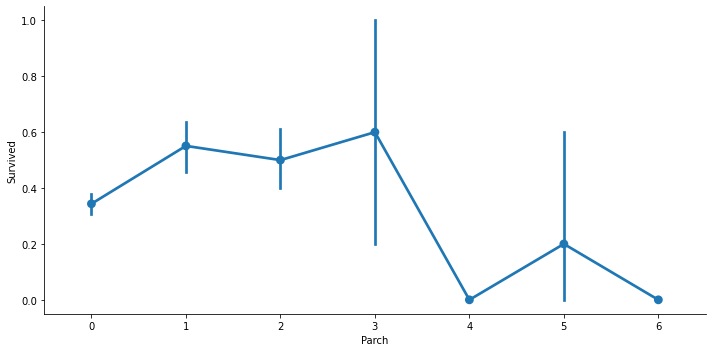

In [523]:
for i, col in enumerate(['SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=df, kind='point', aspect=2)

We see from the plot that generally, survival decreases with increasing number of relatives inside the ship. So we create 1 variable called 'Family_count'

In [524]:
df['Family_count'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0


### Drop unneccessary variables

1. We can drop PassengerId, Name, and Ticket since these are unique values associated to each passenger.
2. We can also drop SibSp and Parch since we already created a combined variable 'Family_count'.
3. The column embarked which indicates the point of embarkation can also be dropped since this is not important for survival.

In [525]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch', 'Embarked'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Family_count
0,0,3,male,22.0,7.2500,0,1
1,1,1,female,38.0,71.2833,1,1
2,1,3,female,26.0,7.9250,0,0
3,1,1,female,35.0,53.1000,1,1
4,0,3,male,35.0,8.0500,0,0


### Convert categorical variables

We convert categorical variables to numerical so we can use in our model. We use the LabelEncoder from sci-kit learn.

In [526]:
label = LabelEncoder()
df['Sex_conv'] = label.fit_transform(df['Sex'])
df.drop(columns='Sex', inplace=True)
df.head()

,Survived,Pclass,Age,Fare,Cabin,Family_count,Sex_conv
0,0,3,22.0,7.2500,0,1,1
1,1,1,38.0,71.2833,1,1,0
2,1,3,26.0,7.9250,0,0,0
3,1,1,35.0,53.1000,1,1,0
4,0,3,35.0,8.0500,0,0,1


### Check for correlation and multicolliniarity

It is important to check that our variables are independent from each other since our models assume independence.

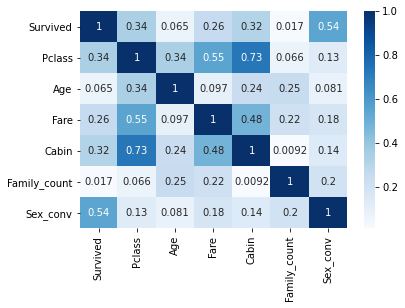

In [527]:
sns.heatmap(np.abs(df.corr()), cmap='Blues', annot=True)

In [528]:
X = df.drop(columns='Survived')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

,VIF Factor,features
0,5.16,Pclass
1,5.12,Age
2,1.99,Fare
3,2.04,Cabin
4,1.56,Family_count
5,2.97,Sex_conv


No 2 variables are strongly correlated with each other and all VIF Factors are less than 10 which indicates that there is no multicollinearity.

In [529]:
df.head()

,Survived,Pclass,Age,Fare,Cabin,Family_count,Sex_conv
0,0,3,22.0,7.2500,0,1,1
1,1,1,38.0,71.2833,1,1,0
2,1,3,26.0,7.9250,0,0,0
3,1,1,35.0,53.1000,1,1,0
4,0,3,35.0,8.0500,0,0,1


### Scale the data

We see that our data features has different scales. Let us standardize this using the StandardScaler from sklearn.

In [530]:
features = df.drop(columns='Survived')

In [531]:
scaler = StandardScaler()

features_scaled = pd.DataFrame(scaler.fit_transform(features), columns = features.columns)
features_scaled.head()

,Pclass,Age,Fare,Cabin,Family_count,Sex_conv
0,0.827377,-0.565736,-0.502445,-0.544925,0.059160,0.737695
1,-1.566107,0.663861,0.786845,1.835115,0.059160,-1.355574
2,0.827377,-0.258337,-0.488854,-0.544925,-0.560975,-1.355574
3,-1.566107,0.433312,0.420730,1.835115,0.059160,-1.355574
4,0.827377,0.433312,-0.486337,-0.544925,-0.560975,0.737695


### Split data into train, validation, and test set

Let us split the data into 60% train, 20% validation, and 20% test set. We use the train_test_split from sklearn twice to create 3 sets.

In [532]:
labels = df['Survived']

X_train, X1, y_train, y1 = train_test_split(features_scaled, labels, test_size = 0.4, stratify=y, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X1, y1, test_size = 0.5, stratify=y1, shuffle=True)

# 2. Fitting and evaluating a model

We will use different classification models namely
    1. Logistic Regression
    2. Support Vector Machines
    3. Random Forest
    4. Gradient Boosting
    5. Multi Layer Perceptron
   
We will also be using 5-fold cross validation using GridSearchCV to get the best hyperparameters for each model.

In [533]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [534]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

The most important hyperparameter for Logistic Regression is "C" which is the regularization parameter.

In [541]:
params = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

lr = GridSearchCV(LogisticRegression(), params, cv=5)
lr.fit(X_train, y_train)
lr.best_params_

{'C': 1}

In [543]:
LR_model = lr.best_estimator_

### Support Vector Machines

In [537]:
SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Aside from the hyperparameter "C", the parameter "kernel" is also important.

In [542]:
params = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 
          'kernel':['rbf', 'linear', 'poly', 'sigmoid']}

svc = GridSearchCV(SVC(), params, cv=5)
svc.fit(X_train, y_train)
svc.best_params_

{'C': 10, 'kernel': 'rbf'}

In [651]:
SVC_model = svc.best_estimator_

### Random Forest

In [547]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Most important parameters: max_depth and n_estimators

In [549]:
params = {'n_estimators':[5, 50, 250, 500], 
          'max_depth':[2, 4, 8, 16, 32, None]}

rf = GridSearchCV(RandomForestClassifier(), params, cv=5)
rf.fit(X_train, y_train)
rf.best_params_

{'max_depth': 8, 'n_estimators': 5}

In [550]:
RF_model = rf.best_estimator_

### Gradient Boosting

In [551]:
GradientBoostingClassifier()

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
Most important parameters: learning_rate, max_depth, n_estimators

In [553]:
params = {'learning_rate': [0.001, 0.1, 1, 10, 100], 
          'n_estimators':[5, 50, 250, 500], 
          'max_depth':[1, 3, 5, 7, 9]}

gb = GridSearchCV(GradientBoostingClassifier(), params, cv=5)
gb.fit(X_train, y_train)
gb.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}

In [650]:
GB_model = gb.best_estimator_

### Multi Layer Perceptron

In [555]:
MLPClassifier()

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Most important parameters: activation, hidden_layer_sizes, learning_rate

In [556]:
params = {'hidden_layer_sizes': [(10,), (50,), (100,)],
          'activation': ['relu', 'tanh', 'logistic'],
          'learning_rate': ['constant', 'invscaling', 'adaptive']}

mlp = GridSearchCV(MLPClassifier(), params, cv=5)
mlp.fit(X_train, y_train)
mlp.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (50,),
 'learning_rate': 'invscaling'}

In [559]:
MLP_model = mlp.best_estimator_

# 3. Comparison and final model selection

In [659]:
from sklearn.metrics import accuracy_score
from time import time

summary = pd.DataFrame(columns=['Model', 'Accuracy Score', 'Prediction Speed'])
models = {'LR':LR_model, 'SVC':SVC_model, 'RF':RF_model, 'GB':GB_model, 'MLP':MLP_model}

In [660]:
def evaluate_model(name, model):
    start=time()
    y_pred = model.predict(X_val)
    stop=time()
    accuracy = accuracy_score(y_val, y_pred)
    global summary
    summary = summary.append({'Model':name, 'Accuracy Score':np.round(accuracy,4), 'Prediction Speed': (stop-start)*1000}, ignore_index=True)

In [661]:
for name, model in models.items():
    evaluate_model(name, model)
    
summary

,Model,Accuracy Score,Prediction Speed
0,LR,0.7697,0.998259
1,SVC,0.8090,3.036737
2,RF,0.7921,1.993895
3,GB,0.8090,0.997543
4,MLP,0.8034,0.998259


Both SVC (Support Vector Machines Classifier) and GB (Gradient Boost Classifier) gave the same accuracy score.
For the final model, we will select Gradient Boost since it is faster.

# 4. Evaluating the final model

In [664]:
y_pred = GB_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy using the final model, GradientBoostClassifier, is: ', np.round(accuracy,4))

Accuracy using the final model, GradientBoostClassifier, is:  0.8156
